# K Nearest Neighbors Regression

Rafiq Islam  
2024-08-29

## Introduction: Non-parametric Models

Non-parametric model is a statistical model that does not make any
assumptions about the underlying data distributions, meaning it does not
require specifying functional form for the relationships between
variables, instead learning directly from the data points without
pre-defined parameters.

## $K-$Nearest Neighbors (KNN) Algorithm

K-Nearest Neighbors (KNN) is one of the simplest yet effective
algorithms used in supervised learning for both classification and
regression problems. It’s a **lazy learner**—meaning it does not perform
any specific training of a model but memorizes the training dataset and
makes predictions based on proximity in feature space.

We are given a set of data points $(\bar{x}_i,y_i)$ with
$\bar{x}_i\in \mathbb{R}^d$ and $y_i\in \mathbb{R}$  
1. Choose the number of neighbors $K$  
2. Compute the distance between the new data point and all the training
samples  
3. Select the $K$ nearest neighbors based on distance.  
4. For **classification**, the output is the most common class among the
$K$ neighbors.  
5. For **regression**, the output is the average of the target values of
$K$ neighbors

### $K-$Nearest Neighbors Classification

The KNN classification algorithm can be summarized with the following
steps:

Given:

-   $X_{train} = [x_1, x_2, \ldots, x_n]$ (the training data features)  
-   $y_{train} = [y_1, y_2, \ldots, y_n]$ (the training data labels)  
-   $x_{test}$ (the new data point for which we want to predict the
    class)

**Steps**

**1. Compute Distance**: For each training point $x_i$, calculate the
distance $d(x_i, x_{test})$ using a distance metric like **Euclidean
distance**: $$
   d(x_i, x_{test}) = \sqrt{\sum_{j=1}^{m} (x_{i,j} - x_{test,j})^2}
   $$ where $m$ is the number of features.

**2. Find K Nearest Neighbors**: Sort the distances and pick the **K**
closest points.

**3. Majority Voting**: Look at the labels $y_i$ of the **K** nearest
neighbors. The predicted label for $x_{test}$ is the most frequent label
(majority vote) among the neighbors.

For example, let’s say our data looks like this

<table>
<colgroup>
<col style="width: 50%" />
<col style="width: 50%" />
</colgroup>
<tbody>
<tr>
<td style="text-align: center;"><div width="50.0%"
data-layout-align="center">
<table>
<caption>Training Data</caption>
<thead>
<tr>
<th style="text-align: center;">area</th>
<th style="text-align: center;">bedroom</th>
<th style="text-align: center;">bathroom</th>
<th style="text-align: center;">price</th>
<th style="text-align: center;">condition</th>
</tr>
</thead>
<tbody>
<tr>
<td style="text-align: center;">7420</td>
<td style="text-align: center;">4</td>
<td style="text-align: center;">2</td>
<td style="text-align: center;">1300000</td>
<td style="text-align: center;">1</td>
</tr>
<tr>
<td style="text-align: center;">7520</td>
<td style="text-align: center;">3</td>
<td style="text-align: center;">3</td>
<td style="text-align: center;">1450000</td>
<td style="text-align: center;">1</td>
</tr>
<tr>
<td style="text-align: center;">6420</td>
<td style="text-align: center;">2</td>
<td style="text-align: center;">1</td>
<td style="text-align: center;">1110000</td>
<td style="text-align: center;">0</td>
</tr>
<tr>
<td style="text-align: center;">5423</td>
<td style="text-align: center;">3</td>
<td style="text-align: center;">2</td>
<td style="text-align: center;">1363400</td>
<td style="text-align: center;">0</td>
</tr>
<tr>
<td style="text-align: center;">5423</td>
<td style="text-align: center;">3</td>
<td style="text-align: center;">1</td>
<td style="text-align: center;">1263400</td>
<td style="text-align: center;">1</td>
</tr>
</tbody>
</table>
</div></td>
<td style="text-align: center;"><div width="50.0%"
data-layout-align="center">
<table>
<caption>Test Data</caption>
<thead>
<tr>
<th style="text-align: center;">area</th>
<th style="text-align: center;">bedroom</th>
<th style="text-align: center;">bathroom</th>
<th style="text-align: center;">price</th>
<th style="text-align: center;">condition</th>
</tr>
</thead>
<tbody>
<tr>
<td style="text-align: center;">5420</td>
<td style="text-align: center;">3</td>
<td style="text-align: center;">2.5</td>
<td style="text-align: center;">1302000</td>
<td style="text-align: center;"></td>
</tr>
<tr>
<td style="text-align: center;">7120</td>
<td style="text-align: center;">5</td>
<td style="text-align: center;">4</td>
<td style="text-align: center;">1453000</td>
<td style="text-align: center;"></td>
</tr>
</tbody>
</table>
</div></td>
</tr>
</tbody>
</table>

For the data points $x_i$ from the training set and a single test data
point $xt=[5420,3,2.5,1302000]$

So the distances

-   $d_1=d(x_1, xt) \approx 2828.43$
-   $d_2=d(x_2, xt) \approx 14805.92$
-   $d_3=d(x_3, xt) \approx 19209.38$
-   $d_4=d(x_4, xt) \approx 61405.03$
-   $d_5=d(x_5, xt) \approx 38602.95$

If we sort the above distances, we get $d_1<d_2<d_3<d_5<d_4$ and if we
choose $K=3$ nearest neighbors, then $d_1<d_2<d_3$ and

-   Data point $x_1$ has class label `condition`$=1$  
-   Data point $x_2$ has class label `condition`$=1$  
-   Data point $x_3$ has class label `condition`$=0$

We can clearly see that the majority class (2 out of 3) is
`condition`$=1$. Therefore, for the given test data, the label would be
also `condition`$=1$.

#### KNN Classifier Using Python

Here’s how to implement KNN for classification in Python from scratch:

In [1]:
import numpy as np
import pandas as pd
from collections import Counter

class CustomKNNclassifier:

    def __init__(self, k=3):
        self.k = k
    
    def fit(self, X, Y):
        self.X = X
        self.Y = Y
    
    def predict(self, X):
        predictions = [self._predict(x) for x in X.to_numpy()] 
        return np.array(predictions)
    
    def _predict(self, x):
        # Compute the Euclidean distances 
        distances = [np.linalg.norm(x - X_train) for X_train in self.X.to_numpy()]

        # Get the indices of the k nearest neighbors
        k_indices = np.argsort(distances)[:self.k]

        # Get the labels of k nearest neighbors
        k_nearest_neighbors = [self.Y[i] for i in k_indices]

        # Return the most common label
        common_label = Counter(k_nearest_neighbors).most_common(1)[0][0]
        return common_label

# Example usage
train_data = pd.DataFrame(
    {
        'area': [7420, 7520, 6420, 5423, 5423],
        'bedroom': [4, 3, 2, 3, 3],
        'bathroom': [2, 3, 1, 2, 1],
        'price': [1300000, 1450000, 1110000, 1363400, 1263400],
        'condition': [1, 1, 0, 0, 1]
    }
)
test_data = pd.DataFrame(
    {
        'area': [5420, 7120],
        'bedroom': [3, 5],
        'bathroom': [2.5, 4],
        'price': [1302000, 1453000]
    }
)

X_train = train_data.drop('condition', axis=1)
y_train = train_data['condition']

X_test = test_data

# Initialize and train the KNN model
classifier = CustomKNNclassifier(k=3)
classifier.fit(X_train, y_train)

# Predict on test data
predictions = classifier.predict(X_test)
print(predictions)

[1 1]

So the complete test set would be

| area | bedroom | bathroom |  price  | condition |
|:----:|:-------:|:--------:|:-------:|:---------:|
| 5420 |    3    |   2.5    | 1302000 |     1     |
| 7120 |    5    |    4     | 1453000 |     1     |

<span style="color:red">Note: We did not scale the data before applying
the classifier. If we scaled, the result might have been different (?).
In practice, we need to scale the data before applying KNN algorithm.
Because computing a large number of distances with big numbers may get
us wrong order and also time cosuming.</span>

### $K-$Nearest Neighbors Regression

KNN regression is slightly different from classification. Instead of
taking a majority vote, we predict the output by averaging the values of
the **K** nearest neighbors.

Given:

-   $X_{train} = [x_1, x_2, \ldots, x_n]$ (the training data features)
-   $y_{train} = [y_1, y_2, \ldots, y_n]$ (the continuous target values)
-   $x_{test}$ (the new data point for which we want to predict the
    value)

**Step-by-Step:**

**1. Compute Distance**: Calculate the Euclidean distance between
$x_{test}$ and each training point $x_i$.  
**2. Find K Nearest Neighbors**: Sort the distances and select the **K**
nearest points.  
**3. Averaging**: The predicted value for $x_{test}$ is the average of
the target values $y_i$ of the **K** nearest neighbors:

$$
\hat{y}_{test} = \frac{1}{K} \sum_{i=1}^{K} y_i
$$

#### KNN Regressor Using Python

Now we use the same training data and test data for this regression. But
this time, our target variable is `price` and test data looks like this

| area | bedroom | bathroom | Condition | price |
|:----:|:-------:|:--------:|:---------:|:-----:|
| 5420 |    3    |   2.5    |     1     |       |
| 7120 |    5    |    4     |     1     |       |

After scaling the data looks like this

<table>
<colgroup>
<col style="width: 50%" />
<col style="width: 50%" />
</colgroup>
<tbody>
<tr>
<td style="text-align: center;"><div width="50.0%"
data-layout-align="center">
<table>
<caption>Training Data</caption>
<thead>
<tr>
<th>area</th>
<th>bedroom</th>
<th>bathroom</th>
<th>condition</th>
<th>price</th>
</tr>
</thead>
<tbody>
<tr>
<td>1.213</td>
<td>1.414</td>
<td>0.267</td>
<td>0.730</td>
<td>1300000</td>
</tr>
<tr>
<td>1.336</td>
<td>0.000</td>
<td>1.603</td>
<td>0.730</td>
<td>1450000</td>
</tr>
<tr>
<td>-0.026</td>
<td>-1.414</td>
<td>-1.336</td>
<td>-1.095</td>
<td>1110000</td>
</tr>
<tr>
<td>-1.261</td>
<td>0.000</td>
<td>0.267</td>
<td>-1.095</td>
<td>1363400</td>
</tr>
<tr>
<td>-1.261</td>
<td>0.000</td>
<td>-1.336</td>
<td>0.730</td>
<td>1263400</td>
</tr>
</tbody>
</table>
</div></td>
<td style="text-align: center;"><div width="50.0%"
data-layout-align="center">
<table>
<caption>Test Data</caption>
<thead>
<tr>
<th>area</th>
<th>bedroom</th>
<th>bathroom</th>
<th>condition</th>
<th>price</th>
</tr>
</thead>
<tbody>
<tr>
<td>-1.266</td>
<td>0.000</td>
<td>0.803</td>
<td>0.730</td>
<td></td>
</tr>
<tr>
<td>0.854</td>
<td>2.828</td>
<td>3.876</td>
<td>0.730</td>
<td></td>
</tr>
</tbody>
</table>
</div></td>
</tr>
</tbody>
</table>

Now we see that

But this time, the order is $d_4<d_5<d_2<d_1<d_3$ and for $k=3$ we have
$d_4<d_5<d_2$. The price for this distances

-   For data point $x_4$, the `price`$=1363400$  
-   For data point $x_5$, the `price`$=1263400$  
-   For data point $x_2$, the `price`$=1450000$

So the predicted price should be the average of this three prices, that
for $xt=[5420,3,2.5,1]$ the price we expect  
$$
price = \frac{1363400+1263400+1450000}{3}=1358933.33
$$

Here’s how to implement KNN for regression in Python from scratch and we
see if we get the same as the hand calculation.

In [2]:
from sklearn.preprocessing import StandardScaler

class CustomKNNRegressor:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train.to_numpy()

    def predict(self, X_test):
        predictions = [self._predict(x) for x in X_test]
        return np.array(predictions)
    
    def _predict(self, x):
        distances = [np.linalg.norm(x-x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_values = [self.y_train[i] for i in k_indices]
        return np.mean(k_nearest_values)

X_train = train_data.drop('price', axis=1)
y_train = train_data['price']

test_data = pd.DataFrame(
    {
        'area': [5420, 7120],
        'bedroom': [3, 5],
        'bathroom': [2.5, 4],
        'condition': [1, 1]
    }
)

X_test = test_data

scaler = StandardScaler()

X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

# Initialize and train the KNN regressor
regressor = CustomKNNRegressor(k=3)
regressor.fit(X_train_sc, y_train)

# Predict on test data
predictions = regressor.predict(X_test_sc)
print(np.round(predictions,2))

[1358933.33 1371133.33]

------------------------------------------------------------------------

### Choosing the Value of **K**

The value of **K** significantly affects the performance of the KNN
algorithm:

-   **Small K**: If **K** is too small, the model is sensitive to noise,
    and the predictions can be unstable.  
-   **Large K**: If **K** is too large, the model becomes more biased,
    and the predictions may be overly smoothed.

A typical way to choose **K** is by trying different values and using
cross-validation to see which value yields the best performance.

------------------------------------------------------------------------

### Distance Metrics

The default metric for KNN is **Euclidean distance**, but depending on
the dataset, other metrics like **Manhattan distance** or **Minkowski
distance** might be more suitable.

-   **Euclidean Distance** (L2 Norm): $$
    d(x_i, x_j) = \sqrt{\sum_{k=1}^{m} (x_{i,k} - x_{j,k})^2}
    $$

-   **Manhattan Distance** (L1 Norm): $$
    d(x_i, x_j) = \sum_{k=1}^{m} |x_{i,k} - x_{j,k}|
    $$

### KNN Implementation

In this section we use KNN regression for `Boston Housing` dataset and
find the optimal $K$ using the `KFold` cross-validation.

In [3]:
df = pd.read_csv('HousingData.csv')

Next we see if there is any missing values. If we have any, we will skip
those observations.

In [4]:
print(df.isnull().sum())
df.dropna(axis=1,inplace=True)
df.head()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

The data looks clean and ready to implement to the KNNRegressor. Note
that, for predictive modeling we need a lot of things, such as
exporatory data analysis (EDA), feature engineering, preprocessing and
others. However, we will simply apply the `KNNRegressor` that we built
from scratch and built-in library function from `scikit-learn` to
explore the algorithm and find the optimal $K$.

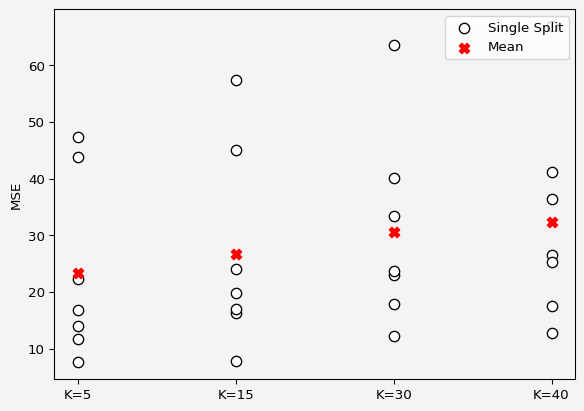

In [5]:
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt 


X = df.drop('MEDV',axis=1)
y = df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size=0.30, random_state=123
)
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

k_values = [5,15,30,40]

kfold = KFold(n_splits=7, shuffle=True, random_state=123)
mses = np.zeros((7,4))

for i,(train_index,test_index) in enumerate(kfold.split(X_train_sc)):
    X_train_train = X_train_sc[train_index]
    X_train_holdout = X_train_sc[test_index]

    y_train_train = y_train.iloc[train_index]
    y_train_holdout = y_train.iloc[test_index]

    for j,k in enumerate(k_values):
        regressor1 = CustomKNNRegressor(k=k)
        regressor1.fit(X_train_train, y_train_train)
        preds = regressor1.predict(X_train_holdout)
        mses[i,j] = mean_squared_error(preds, y_train_holdout)

plt.scatter(np.zeros(7),mses[:,0], s=60, c='white', edgecolors='black', label='Single Split')
plt.scatter(np.ones(7),mses[:,1],s=60, c='white', edgecolors='black')
plt.scatter(2*np.ones(7),mses[:,2],s=60, c='white', edgecolors='black')
plt.scatter(3*np.ones(7),mses[:,3],s=60, c='white', edgecolors='black')
plt.scatter([0,1,2,3], np.mean(mses, axis=0), s=60,c='r', marker='X', label='Mean')
plt.legend(loc='upper right')
plt.xticks([0,1,2,3],['K=5','K=15','K=30','K=40'])
plt.ylabel('MSE')
plt.gca().set_facecolor('#f4f4f4')
plt.gcf().patch.set_facecolor('#f4f4f4')
plt.show()

So, $K=5$ seems optimal based on our custom built regressor. Now if we
do the same thing using the `scikit-learn` library

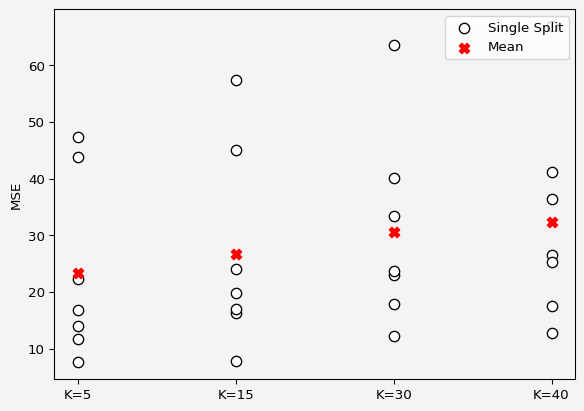

In [6]:
from sklearn.neighbors import KNeighborsRegressor


mses = np.zeros((7,4))

for i,(train_index,test_index) in enumerate(kfold.split(X_train_sc)):
    X_train_train = X_train_sc[train_index]
    X_train_holdout = X_train_sc[test_index]

    y_train_train = y_train.iloc[train_index]
    y_train_holdout = y_train.iloc[test_index]

    for j,k in enumerate(k_values):
        regressor2 = KNeighborsRegressor(k)
        regressor2.fit(X_train_train, y_train_train)
        preds = regressor2.predict(X_train_holdout)
        mses[i,j] = mean_squared_error(preds, y_train_holdout)

plt.scatter(np.zeros(7),mses[:,0], s=60, c='white', edgecolors='black', label='Single Split')
plt.scatter(np.ones(7),mses[:,1],s=60, c='white', edgecolors='black')
plt.scatter(2*np.ones(7),mses[:,2],s=60, c='white', edgecolors='black')
plt.scatter(3*np.ones(7),mses[:,3],s=60, c='white', edgecolors='black')
plt.scatter([0,1,2,3], np.mean(mses, axis=0), s=60,c='r', marker='X', label='Mean')
plt.legend(loc='upper right')
plt.xticks([0,1,2,3],['K=5','K=15','K=30','K=40'])
plt.ylabel('MSE')
plt.gca().set_facecolor('#f4f4f4')
plt.gcf().patch.set_facecolor('#f4f4f4')
plt.show()

In both method, we got $K=5$ is the optimal number of neighbors for KNN
regression. Let’s apply this in our test dataset

In [7]:
regressor = CustomKNNRegressor(k=5)
regressor.fit(X_train_sc, y_train)

predictions = regressor.predict(X_test_sc)

mse = mean_squared_error(predictions,y_test)
rsquared = r2_score(predictions,y_test)
print('MSE = {}'.format(np.round(mse,2)),' and R-square = {}'.format(np.round(rsquared,2)))

MSE = 41.26  and R-square = 0.23

### Conclusion

K-Nearest Neighbors is a simple, intuitive algorithm that can be highly
effective in both classification and regression problems. Its simplicity
comes from the fact that it doesn’t make any assumptions about the
underlying data distribution (it’s non-parametric). However, its
performance can be sensitive to the choice of **K** and the distance
metric. <br> <br> Although it’s easy to implement, KNN can become
computationally expensive for large datasets, as it requires calculating
distances between the test point and all training samples. <br> <br> If
you need an efficient version, it’s always possible to use optimized
libraries like scikit-learn, but writing the algorithm from scratch
helps build a solid understanding.

### When to Use KNN Over Linear Regression?

We would consider using KNN regression over linear regression in the
following situations:

-   **Non-linear relationships**: When the data shows non-linear
    patterns or complex relationships between features and target
    variables that cannot be captured by a straight line.  
-   **Local behavior**: When data has local patterns or clusters, and
    you believe that predictions should rely on the nearest data
    points.  
-   **Minimal assumptions**: If you do not want to assume a specific
    relationship between the features and target, KNN’s non-parametric
    nature might be more appropriate.  
-   **Smaller datasets**: KNN works well with smaller datasets and
    lower-dimensional data where calculating distances is feasible and
    efficient.

However, KNN becomes less efficient and struggles in high dimensions or
when the dataset is large. In those cases, linear regression or other
more scalable models may be more appropriate

------------------------------------------------------------------------

## References

1.  **KNN Regressor Overview:**
    -   Géron, Aurélien. *Hands-On Machine Learning with Scikit-Learn,
        Keras, and TensorFlow: Concepts, Tools, and Techniques to Build
        Intelligent Systems*. O’Reilly Media, 2019. This book provides
        an in-depth explanation of KNN, including its behavior in
        non-linear data and high-dimensionality challenges.
    -   Bishop, Christopher M. *Pattern Recognition and Machine
        Learning*. Springer, 2006. This book covers non-parametric
        methods like KNN, highlighting the “curse of dimensionality” and
        distance-based approaches.
2.  **KNN vs. Linear Regression (Model Assumptions & Complexity of
    Data):**
    -   Hastie, Trevor, Tibshirani, Robert, and Friedman, Jerome. *The
        Elements of Statistical Learning: Data Mining, Inference, and
        Prediction*. Springer, 2009. This source discusses the
        assumptions behind linear regression and the flexibility of
        non-parametric models like KNN.
    -   Kuhn, Max, and Johnson, Kjell. *Applied Predictive Modeling*.
        Springer, 2013. The comparison between parametric (like linear
        regression) and non-parametric models (like KNN) is elaborated
        in this book.
3.  **Interpretability:**
    -   Molnar, Christoph. *Interpretable Machine Learning: A Guide for
        Making Black Box Models Explainable*. 2019. This book emphasizes
        the trade-offs between interpretable models like linear
        regression and more black-box models like KNN.
    -   Murdoch, W. James, et al. “Definitions, methods, and
        applications in interpretable machine learning.” *Proceedings of
        the National Academy of Sciences* 116.44 (2019): 22071-22080.
4.  **Sensitivity to Outliers:**
    -   Aggarwal, Charu C. *Data Classification: Algorithms and
        Applications*. Chapman and Hall/CRC, 2014. This discusses the
        impact of outliers on different models, including linear
        regression and KNN.
    -   Friedman, Jerome, et al. *The Elements of Statistical Learning*.
        Springer Series in Statistics, 2001. Sensitivity to outliers is
        compared across various regression techniques, including KNN.
5.  **Handling High-Dimensional Data:**
    -   Domingos, Pedro. “A few useful things to know about machine
        learning.” *Communications of the ACM* 55.10 (2012): 78-87. This
        paper discusses challenges like the curse of dimensionality in
        models like KNN.
    -   Verleysen, Michel, and François, Damien. “The curse of
        dimensionality in data mining and time series prediction.”
        *International Work-Conference on Artificial Neural Networks*.
        Springer, 2005.
6.  **Training and Prediction Time:**
    -   Shalev-Shwartz, Shai, and Ben-David, Shai. *Understanding
        Machine Learning: From Theory to Algorithms*. Cambridge
        University Press, 2014. Provides insights into the computational
        cost differences between linear and non-parametric models like
        KNN.
    -   Li, Zhe, et al. “Fast k-nearest neighbor search using GPU.”
        *International Conference on Image and Graphics*.
        Springer, 2015. This paper discusses computational complexity
        related to KNN.
7.  **Overfitting and Flexibility:**
    -   Yao, Ying, et al. “Overfitting and Underfitting: A Visual
        Explanation.” Towards Data Science, 2019. Offers a visual and
        intuitive explanation of the bias-variance tradeoff in KNN and
        linear models.
    -   Rasmussen, Carl E., and Williams, Christopher KI. *Gaussian
        Processes for Machine Learning*. MIT Press, 2006. Discusses
        overfitting in KNN due to small values of `k` and regularization
        techniques for linear models.

------------------------------------------------------------------------

**Share on**

<a target="_blank" 
 href="https://www.facebook.com/sharer/sharer.php?u=https%3A%2F%2Fmrislambd.github.io%2Fdsandml%2Fknn%2F&amp;src=sdkpreparse" 
 class="fb-xfbml-parse-ignore">Share</a>

<script src="https://platform.linkedin.com/in.js" type="text/javascript">lang: en_US</script>

<script type="IN/Share" data-url="https://mrislambd.github.io/dsandml/knn/"></script>

<a href="https://twitter.com/share?ref_src=twsrc%5Etfw" class="twitter-share-button" 
 data-url="https://mrislambd.github.io/dsandml/knn/" data-show-count="true">Tweet</a>

<script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>

**You may also like**